# Importando Bibliotecas

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

# Funções Auxiliares

In [31]:
def dataFrame_to_boxPlot(dataFrame,var):
    data = {}
    column_value = []
    column_x = []

    for column in range(len(dataFrame.columns)):
        column_value += list(dataFrame.iloc[:,column])
        column_x += [f'x{column+1}' for i in range(len(dataFrame))]

    data[var]=column_value
    data['x']=column_x
    return pd.DataFrame(data)

In [32]:
def describe_var(dataframe,var):
    resultado_var = {}
    
    for periodo in range(len(dataframe.iloc[0,0])):
        aux = []
        for list in dataframe[var]:
            aux.append(list[periodo])
        resultado_var[f'{var}{periodo+1}'] = aux

    return pd.DataFrame(resultado_var)

In [33]:
def describe_dist_var(dataframe_1,dataframe_2,var):
    distancias_var = {}
        
    for periodo in range(52):
        aux = []
        for list_1 in dataframe_1[var]:
            for list_2 in dataframe_2[var]:
                aux.append(math.fabs(list_1[periodo]-list_2[periodo]))
        distancias_var[f'x{periodo+1}'] = aux

    return pd.DataFrame(distancias_var)

# Importando Dados

In [34]:
past = 'C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Previsoes/'

In [35]:
previsoes_np = {}
previsoes = []
for index in range(3):
    with open(past+f'Prev_pro/Previsao_pro{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_np['demandas'] = previsoes
previsoes_np = pd.DataFrame(previsoes_np)
previsoes_np.head()


,demandas
0,"[89.02737426757812, 89.19369506835938, 89.4882..."
1,"[89.04051208496094, 89.37220764160156, 89.7143..."
2,"[89.12734985351562, 89.3468246459961, 89.70494..."


In [36]:
previsoes_ar = {}
previsoes = []
for index in range(3):
    with open(past+f'Prev_ari/Previsao_ari{index}.txt', "r") as arquivo:
	    previsoes.append([float(demanda) for demanda in arquivo.read().split(',')])
            
previsoes_ar['demandas'] = previsoes
previsoes_ar = pd.DataFrame(previsoes_ar)

In [37]:
demandas_treino = pd.read_csv('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/tabelas/Demandas_treinamento/demandas')['demandas']
demandas_treino.head()

0    90
1    89
2    90
3    90
4    92
Name: demandas, dtype: int64

In [38]:
demandas = {}
demandas_aux = []
for i in range(0,int(len(demandas_treino)/52)):
    demandas_aux.append(list(demandas_treino[i*52:(i+1)*52].values))
demandas['demandas'] = demandas_aux
demandas = pd.DataFrame(demandas)

In [39]:
previsoes_ar

,demandas
0,"[88.83563051221113, 88.9374366422461, 89.89922..."
1,"[88.83563051221113, 88.9374366422461, 89.89922..."
2,"[88.83563051221113, 88.9374366422461, 89.89922..."


# Analise Das Previsões

In [40]:
previsao_demanda_np = describe_var(previsoes_np,'demandas')
previsao_demanda_ar = describe_var(previsoes_ar,'demandas')
demandas_d = describe_var(demandas,'demandas')

In [41]:
boxPlot_previsao_np = dataFrame_to_boxPlot(previsao_demanda_np,'demandas')
boxPlot_previsao_ar = dataFrame_to_boxPlot(previsao_demanda_ar,'demandas')
boxPlot_demandas = dataFrame_to_boxPlot(demandas_d,'demandas')

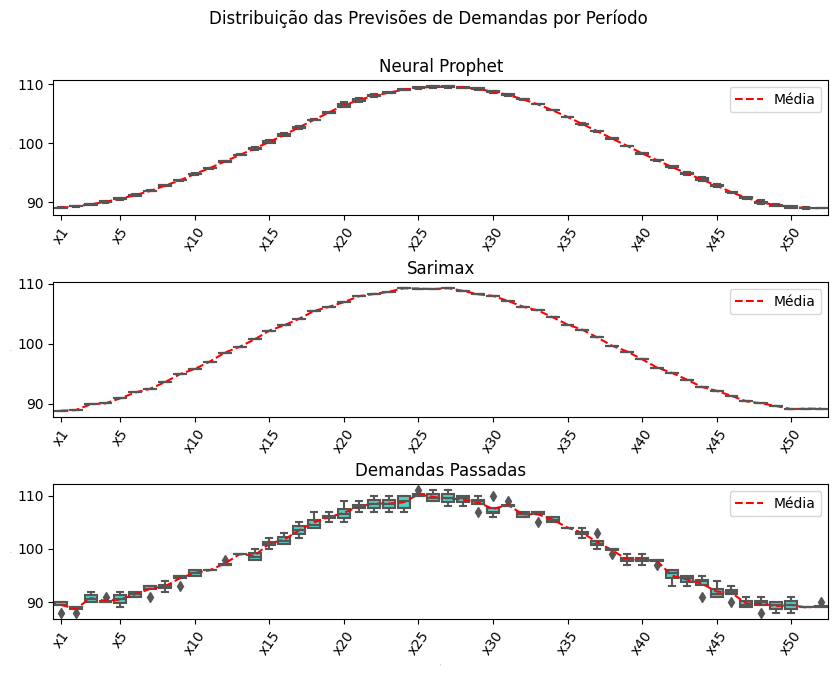

In [42]:
fig=plt.figure(figsize=(10,7))
fig.suptitle('Distribuição das Previsões de Demandas por Período')



plt.subplots_adjust(wspace=0, hspace=0.5)

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet')
sns.boxplot(data=boxPlot_previsao_np,x='x',y='demandas',color='turquoise')
plt.plot(previsao_demanda_np.columns,previsao_demanda_np.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_np.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,2)
ax.set_title('Sarimax')
sns.boxplot(data=boxPlot_previsao_ar,x='x',y='demandas',color='turquoise')
plt.plot(previsao_demanda_np.columns,previsao_demanda_ar.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(previsao_demanda_ar.columns)/5)+1)])
plt.legend()


ax=fig.add_subplot(3,1,3)
ax.set_title('Demandas Passadas')
sns.boxplot(data=boxPlot_demandas,x='x',y='demandas',color='turquoise')
plt.plot(demandas_d.columns,demandas_d.describe().iloc[1,:],color='red',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(demandas_d.columns)/5)+1)])
plt.legend()

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/Previsoes.png', format='png', bbox_inches='tight',pad_inches = 0.1)

In [43]:
dist_NA = describe_dist_var(previsoes_np,previsoes_ar,'demandas')
boxPlot_dist_NA = dataFrame_to_boxPlot(dist_NA,'dist')

dist_NT = describe_dist_var(previsoes_np,demandas,'demandas')
boxPlot_dist_NT = dataFrame_to_boxPlot(dist_NT,'dist')

dist_AT = describe_dist_var(previsoes_ar,demandas,'demandas')
boxPlot_dist_AT = dataFrame_to_boxPlot(dist_AT,'dist')

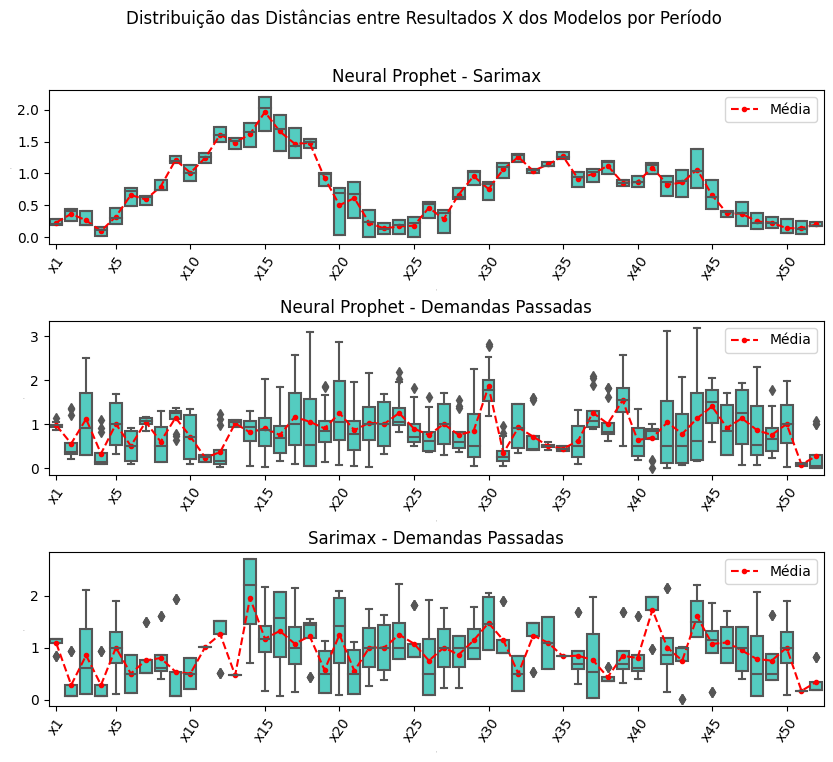

In [44]:
fig=plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0, hspace=0.5)
fig.suptitle('Distribuição das Distâncias entre Resultados X dos Modelos por Período')

ax=fig.add_subplot(3,1,1)
ax.set_title('Neural Prophet - Sarimax')
sns.boxplot(data=boxPlot_dist_NA,x='x',y='dist',color='turquoise')
plt.plot(dist_NA.columns,dist_NA.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_NA.columns)/5)+1)])
plt.legend()

ax=fig.add_subplot(3,1,2)
ax.set_title('Neural Prophet - Demandas Passadas')
sns.boxplot(data=boxPlot_dist_NT,x='x',y='dist',color='turquoise')
plt.plot(dist_NT.columns,dist_NT.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_NT.columns)/5)+1)])
plt.legend()

ax=fig.add_subplot(3,1,3)
ax.set_title('Sarimax - Demandas Passadas')
sns.boxplot(data=boxPlot_dist_AT,x='x',y='dist',color='turquoise')
plt.plot(dist_AT.columns,dist_AT.describe().iloc[1,:],color='red',marker='.',linestyle='--',label='Média')
plt.xlabel([], fontsize=0)
plt.ylabel([], fontsize=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(55)
plt.xticks([0]+[i*5-1 for i in range(1,int(len(dist_AT.columns)/5)+1)])
plt.legend()

plt.savefig('C:/Users/marcio/Documents/Prev_For_ULS/Resultados/img/PrevisoesDif.png', format='png', bbox_inches='tight',pad_inches = 0.1)